# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

## Import necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()

In [13]:
import tensorflow as tf

## Create Data to view & fit

In [14]:
from sklearn.datasets import make_circles

# Craete 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples, shuffle=True, noise=0.03, random_state=42)

In [15]:
# Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [16]:
# Labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [17]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "labels":y})

In [18]:
circles.head()

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [19]:
# Check for data imbalance
circles["labels"].value_counts()

1    500
0    500
Name: labels, dtype: int64

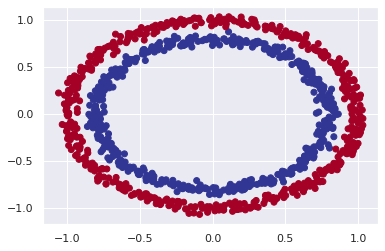

In [20]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Check for Input & Output

In [21]:
# Check the shape of features & labels
X.shape, y.shape

((1000, 2), (1000,))

In [22]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [23]:
# No of samples in featues & labels
len(X), len(y) 

(1000, 1000)

## Steps in Modelling


The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate...

In [24]:
# set seed 
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=40)

# Create a model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ], name = "Circle_Classification_model_1"
)

# Compile the model
model_1.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["accuracy"]
)

# Fit the model
model_1.fit(X, y, epochs=500, verbose=0, callbacks=[callback])


In [25]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933428049087524, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add some layers & features.

## Improving the model

In [26]:
# set seed 
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=40)

# Create a model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=(None, 1)),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Circle_Classification_model_2"
)

# Compile the model
model_2.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"]
)

# Fit the model
model_2.fit(X, y, epochs=500, verbose=0, callbacks=[callback])


In [27]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932500600814819, 0.5]

🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [28]:
def plot_decision_boundry(model, X, y):

  # setting Boundry limits  
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  # Create a meshgrid
  xx, yy = np.meshgrid( np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100)) 

  # Creating X values 
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Making predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print(" This is Multi-Class Classification ")
    y_pred = np.argmax( y_pred, axis=1).reshape(xx.shape)
  else:
    print(" This is Binary-Class Classification ")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot disicion boundry 
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=50, cmap=plt.cm.RdYlBu)  
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)    

313/313 [==============================] - 1s 1ms/step
 This is Multi-Class Classification 


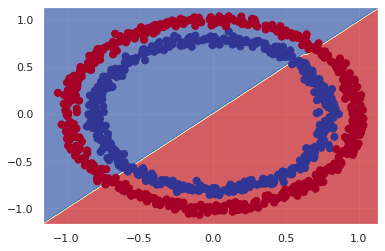

In [29]:
plot_decision_boundry(model=model_2, X=X, y=y)

### Using Classification model for regression problem

In [30]:
# Let's see our model is fit for regression model

tf.random.set_seed(42)

X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

# Split data into training and testing
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Create the model
model_reg = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Regression_model"
)

# Compile the model, this time with specific regression loss function
model_reg.compile(
                  loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"]
)

# Fit the model with regression data
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


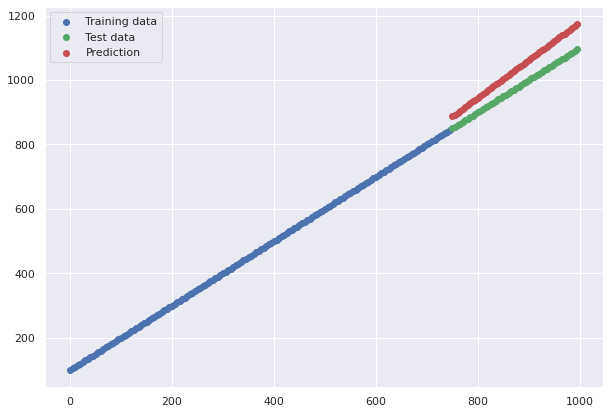

In [31]:
# Make predictions
y_pred_reg = model_reg.predict(X_reg_test)

# Plot model's prediction
plt.figure(figsize=(10,7))
plt.scatter(x=X_reg_train, y=y_reg_train, c="b", label="Training data")
plt.scatter(x=X_reg_test, y=y_reg_test, c="g", label="Test data")
plt.scatter(x=X_reg_test, y=y_pred_reg, c="r", label="Prediction")
plt.legend();

## The missing piece: Non-Linearity 

In [32]:
# set seed 
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=40)

# Create a model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

    ], name = "Circle_Classification_model_3"
)

# Compile the model
model_3.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"]
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

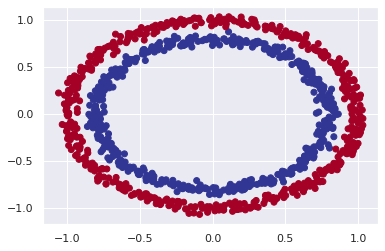

In [33]:
# Chec out our data
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 


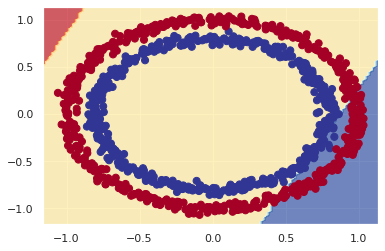

In [34]:
# Check for decision boundry plot for latest model
plot_decision_boundry(model_3, X, y)

In [35]:
# set seed 
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Create a model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu), 
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "Circle_Classification_model_3"
)

# Compile the model
model_3.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"]
)

# Fit the model
model_3.fit(X, y, epochs=200, verbose=1, callbacks=[callback])


Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [36]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9930


[0.06901049613952637, 0.9929999709129333]

313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 


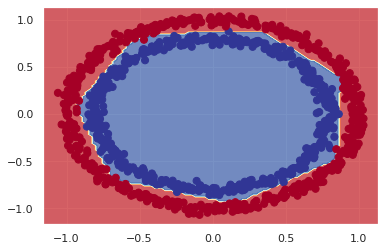

In [37]:
plot_decision_boundry(model_3, X, y)

🤔 **Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? 

Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

## Activation Functions  

In [38]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

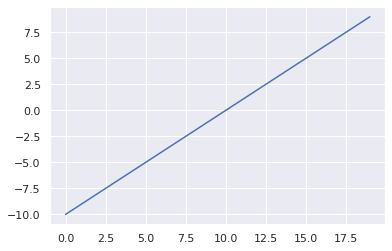

In [39]:
# Visualize our toy tensor
plt.plot(A);

In [40]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

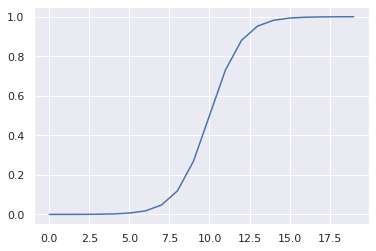

In [41]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [42]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

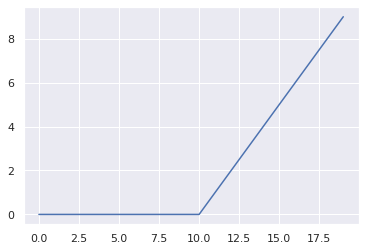

In [43]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [44]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

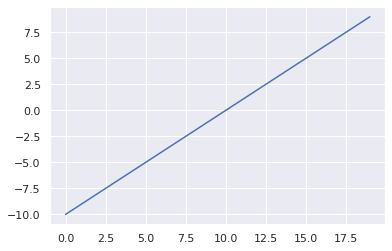

In [45]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [46]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classificiation model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [47]:
len(X), len(y)

(1000, 1000)

In [48]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [49]:
# set seed 
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Create a model
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu), 
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "Circle_Classification_model_4"
)

# Compile the model
model_4.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(lr=0.01),
                  metrics = ["accuracy"]
)

# Fit the model
meta = model_4.fit(X_train, y_train, epochs=25, verbose=1, callbacks=[callback])


Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [50]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 
313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 


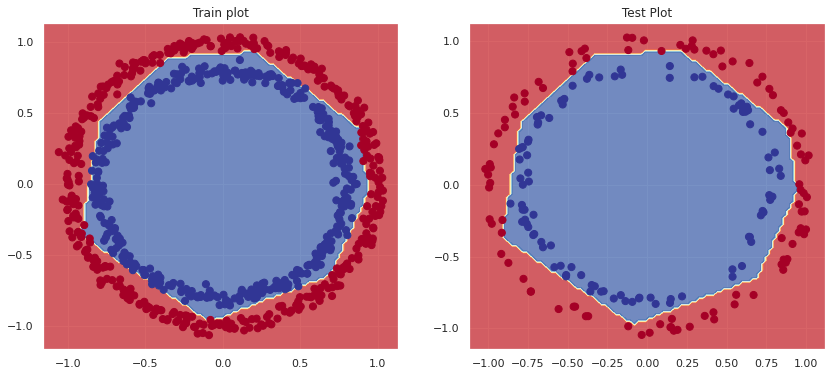

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.title(" Train plot ")
plot_decision_boundry(model=model_4, X=X_train, y=y_train) 
plt.subplot(1,2,2)
plt.title(" Test Plot ")
plot_decision_boundry(model=model_4, X=X_test, y=y_test)

In [52]:
model_4.summary()

Model: "Circle_Classification_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.utils import plot_model

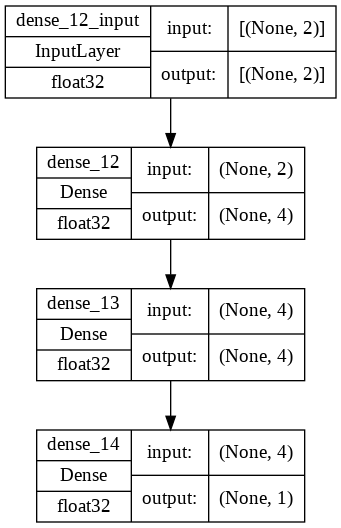

In [54]:
plot_model(model_4, show_dtype=True, show_shapes=True)

## Plotting the training loss

In [55]:
history = pd.DataFrame(data=meta.history, columns=["loss", "accuracy"])
history

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


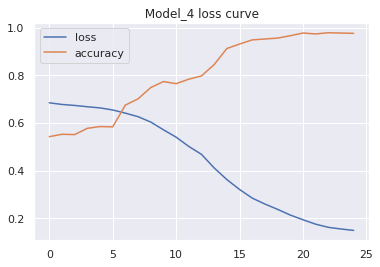

In [56]:
# Plot history object
history.plot()
plt.title(" Model_4 loss curve ");

## Finding the best learning rate

In [57]:
# set seed 
tf.random.set_seed(42)

stop_sense = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Create a model
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu), 
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "Circle_Classification_model_4"
)

# Compile the model
model_4.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics = ["accuracy"]
)

# Learning rate Scheduler
lrs = tf.keras.callbacks.LearningRateScheduler(schedule = lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
meta4 = model_4.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[stop_sense,lrs])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

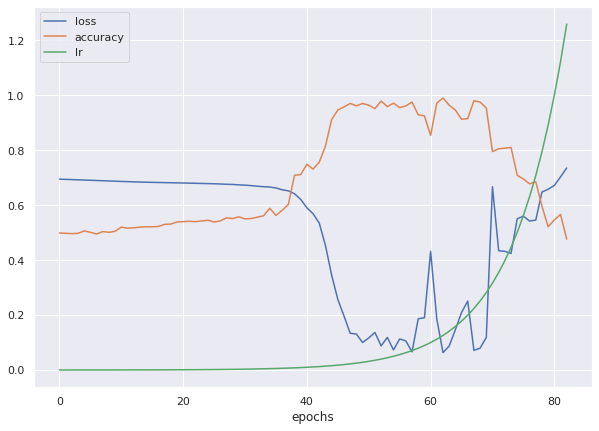

In [58]:
pd.DataFrame(data=meta4.history, columns=["loss", "accuracy", "lr"]).plot(figsize=(10,7), xlabel="epochs")

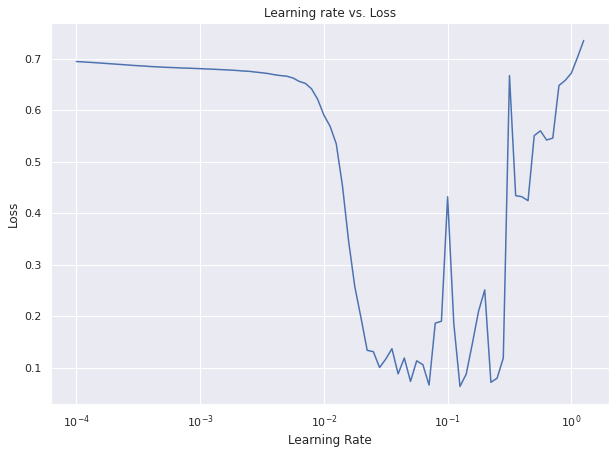

In [59]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(meta4.history["lr"], meta4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

## Training the model with ideal learning rate

In [60]:
# set seed 
tf.random.set_seed(42)

stop_sense = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Create a model
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu), 
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "Circle_Classification_model_5"
)

# Compile the model
model_5.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                  metrics = ["accuracy"]
)

# Learning rate Scheduler
#lrs = tf.keras.callbacks.LearningRateScheduler(schedule = lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
meta5 = model_5.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[stop_sense])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/

In [61]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950


[0.018566008657217026, 0.9950000047683716]

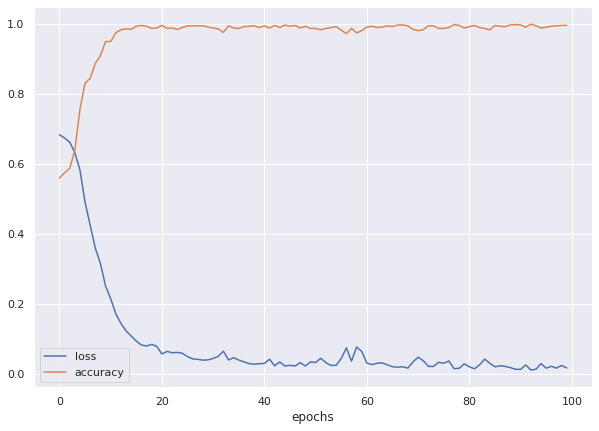

In [62]:
pd.DataFrame(data=meta5.history, columns=["loss", "accuracy"]).plot(figsize=(10,7), xlabel="epochs")

313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 
313/313 [==============================] - 0s 1ms/step
 This is Binary-Class Classification 


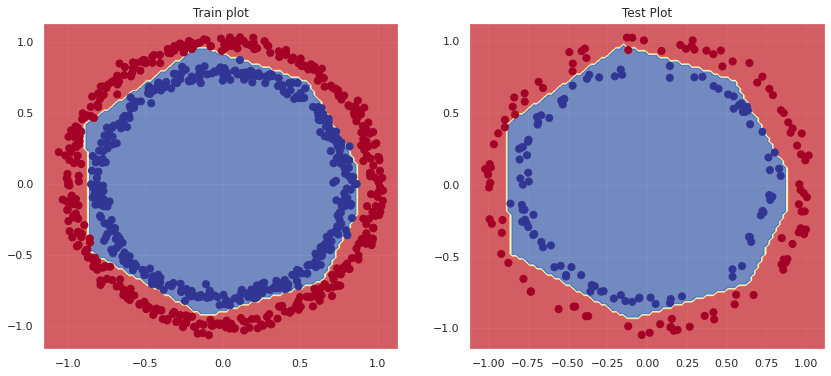

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.title(" Train plot ")
plot_decision_boundry(model=model_5, X=X_train, y=y_train) 
plt.subplot(1,2,2)
plt.title(" Test Plot ")
plot_decision_boundry(model=model_5, X=X_test, y=y_test)

## Classification evaluaion metrics


Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision 
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  

In [65]:
y_preds = model_5.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


In [66]:
classification_report(y_true=y_test, y_pred=tf.round(y_preds))

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       101\n           1       0.99      1.00      0.99        99\n\n    accuracy                           0.99       200\n   macro avg       0.99      1.00      0.99       200\nweighted avg       1.00      0.99      1.00       200\n'

(-0.5, 1.5, 1.5, -0.5)

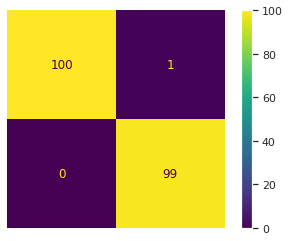

In [77]:
ConfusionMatrixDisplay(cm).plot()
plt.axis(False) 

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

##  Importing dataset

In [68]:
from tensorflow.keras.datasets import fashion_mnist

In [69]:
# The data has been sorted for training & testing for us already
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [70]:
# Peek into the first training data
print(f"Training samples:\n{train_data[0]}\n")
print(f"Train labels:\n{train_labels[0]}")

Training samples:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [71]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

(-0.5, 27.5, 27.5, -0.5)

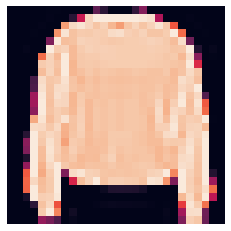

In [76]:
# Viewing the images
plt.imshow(train_data[7])
plt.axis(False)